<a href="https://colab.research.google.com/github/ghgit1798/2021-financial-competition/blob/Guhyeon/%EC%A0%84%EB%AC%B8%EC%84%9C%EB%B9%84%EC%8A%A4_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
sh = pd.read_csv('신한카드_업종대분류 전처리완료.csv', index_col=0, encoding='utf-8')

In [ ]:
sh.columns

Index(['기준년월', '광역시도명', '업종대분류', '업종중분류', '업종소분류', '신규가맹점수', '해지가맹점수',
       '매출가맹점수', '카드매출금액', '카드매출건수', '점당매출금액', '건당매출금액'],
      dtype='object')

In [ ]:
sh['업종대분류'].unique()

array(['문화레져', '생활서비스', '음식', '일반유통', '전문서비스', '종합유통', '기타'], dtype=object)

In [ ]:
sh = sh[sh['업종대분류'].str.contains('전문서비스')]

In [ ]:
# car = sh[sh['업종중분류']=='자동차']
# sh = sh[sh['업종중분류']!='자동차']

In [ ]:
sh

,기준년월,광역시도명,업종대분류,업종중분류,업종소분류,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
225,201903,강원,전문서비스,개인병원,병원-가정의학과,0,0,22,33925000,3048,1542025,11130
226,201903,강원,전문서비스,개인병원,병원-기타,0,0,1,37259000,142,37259350,262390
227,201903,강원,전문서비스,개인병원,병원-내과,0,0,121,310469000,15646,2565857,19843
228,201903,강원,전문서비스,개인병원,병원-마취과,1,0,23,91064000,2079,3959288,43802
229,201903,강원,전문서비스,개인병원,병원-비뇨기과,0,0,26,130026000,3935,5001009,33044
...,...,...,...,...,...,...,...,...,...,...,...,...
23870,202009,충북,전문서비스,학원,학원-직업,0,0,113,656821000,2303,5812579,285203
23871,202009,충북,전문서비스,학원,시험접수,0,0,1,27937000,344,27937300,81213
23872,202009,충북,전문서비스,한의학,병원-한의학과,0,0,406,984171000,25264,2424067,38955
23873,202009,충북,전문서비스,한의학,한약방,0,0,19,43485000,196,2288684,221862


In [ ]:
group = sh.groupby(by='업종중분류').sum().reset_index()
group.drop(columns='기준년월', inplace=True)
group

,업종중분류,신규가맹점수,해지가맹점수,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,개인병원,1261,754,210320,1417923283000,21526279,9111632604,91705681
1,교육/연구/학교,3227,4493,157036,325706792000,2720167,1887596103,101206033
2,금융,7,13,3408,1576982328000,15489091,24280172220,46098866
3,대학병원,18,6,2663,486052214000,5610702,12707156098,7042935
4,보건소,18,1,986,619011000,69574,48933013,1092228
5,보관/창고업,23,5,434,1038362000,16847,145236095,7277257
6,부동산,330,192,6477,24103659000,1371441,939063610,16812947
7,상담,383,155,11514,16455060000,76774,269700669,53880699
8,상조,155,82,3648,135266427000,2378223,2873976283,224669265
9,상품권,580,97,6284,216109231000,1565527,2110021299,62425315


In [ ]:
group = group[group['매출가맹점수']!=0]
group = group[group['카드매출건수']!=0]

In [ ]:
# 점당매출금액, 건당매출금액 재계산
group['점당매출금액'] = group['카드매출금액']//group['매출가맹점수']
group['건당매출금액'] = group['카드매출금액']//group['카드매출건수']

In [ ]:
vcols = ['매출가맹점수', '카드매출금액', '카드매출건수', '점당매출금액', '건당매출금액']

In [ ]:
# 표준화 수행
cls = group[vcols]
cols = cls.columns
scaler = StandardScaler()
scaler.fit(cls)
scaled = scaler.transform(cls)
scaled

array([[ 1.77634273,  1.75659401,  2.04513283, -0.35239596, -0.40558326],
       [ 1.16989802, -0.14697266, -0.29896462, -0.39723763, -0.26121613],
       [-0.57859849,  2.03380965,  1.29262445,  4.02823326, -0.30925543],
       [-0.58707761,  0.13248494,  0.06132759,  1.33629339, -0.34994612],
       [-0.60616416, -0.71355105, -0.62934914, -0.41113198, -0.55826917],
       [-0.61244667, -0.71282019, -0.63592133, -0.39417831, -0.41693313],
       [-0.54366908, -0.6726209 , -0.46707727, -0.38141186, -0.53501199],
       [-0.48634114, -0.68595124, -0.6284517 , -0.40343365, -0.00770264],
       [-0.57586696, -0.47888116, -0.34158641, -0.06094308, -0.42968197],
       [-0.54586568, -0.33798449, -0.44288532, -0.08677814, -0.21215842],
       [ 0.45157448,  2.8255421 ,  3.00555742, -0.20939411, -0.39588428],
       [-0.57764246, -0.66791955, -0.62787583, -0.34343006,  0.30035188],
       [-0.50504072, -0.2571803 , -0.61902712, -0.16171315,  4.03402776],
       [ 0.16254469, -0.02230631, -0.4

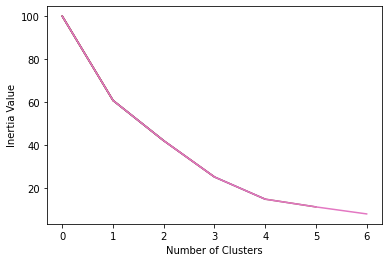

In [ ]:
# screeplot 그리기
def elbow(x):
  sse = []

  for i in range(1, 8):
    km = KMeans(n_clusters=i)
    km.fit(x)
    sse.append(km.inertia_)
    plt.plot(sse)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia Value')
  plt.show()

elbow(scaled)

In [ ]:
# cluster 수는 2개로 결정
km = KMeans(n_clusters=3)
km.fit(scaled)
km.cluster_centers_

array([[-0.31327395, -0.45220985, -0.38319487, -0.19189412,  0.06827282],
       [ 1.86366057,  1.73384931,  1.61283116, -0.31930911, -0.26103657],
       [-0.57859849,  2.03380965,  1.29262445,  4.02823326, -0.30925543]])

In [ ]:
cluster = pd.DataFrame(km.cluster_centers_, columns=cls.columns)
cluster

,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,-0.313274,-0.452210,-0.383195,-0.191894,0.068273
1,1.863661,1.733849,1.612831,-0.319309,-0.261037
2,-0.578598,2.033810,1.292624,4.028233,-0.309255


In [ ]:
predict = pd.DataFrame(km.predict(scaled))
predict.columns = ['클러스터']
predict

,클러스터
0,1
1,0
2,2
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
scaled = pd.DataFrame(data=scaled, columns=cls.columns)
scaled

,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,1.776343,1.756594,2.045133,-0.352396,-0.405583
1,1.169898,-0.146973,-0.298965,-0.397238,-0.261216
2,-0.578598,2.033810,1.292624,4.028233,-0.309255
3,-0.587078,0.132485,0.061328,1.336293,-0.349946
4,-0.606164,-0.713551,-0.629349,-0.411132,-0.558269
5,-0.612447,-0.712820,-0.635921,-0.394178,-0.416933
6,-0.543669,-0.672621,-0.467077,-0.381412,-0.535012
7,-0.486341,-0.685951,-0.628452,-0.403434,-0.007703
8,-0.575867,-0.478881,-0.341586,-0.060943,-0.429682
9,-0.545866,-0.337984,-0.442885,-0.086778,-0.212158


In [ ]:
names = pd.DataFrame(group['업종중분류'])
names.reset_index(inplace=True, drop=True)
names

,업종중분류
0,개인병원
1,교육/연구/학교
2,금융
3,대학병원
4,보건소
5,보관/창고업
6,부동산
7,상담
8,상조
9,상품권


In [ ]:
# names와 결합
result = pd.concat([scaled, names], axis=1)
result = pd.concat([result, predict], axis=1)
result

,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액,업종중분류,클러스터
0,1.776343,1.756594,2.045133,-0.352396,-0.405583,개인병원,1
1,1.169898,-0.146973,-0.298965,-0.397238,-0.261216,교육/연구/학교,0
2,-0.578598,2.033810,1.292624,4.028233,-0.309255,금융,2
3,-0.587078,0.132485,0.061328,1.336293,-0.349946,대학병원,0
4,-0.606164,-0.713551,-0.629349,-0.411132,-0.558269,보건소,0
5,-0.612447,-0.712820,-0.635921,-0.394178,-0.416933,보관/창고업,0
6,-0.543669,-0.672621,-0.467077,-0.381412,-0.535012,부동산,0
7,-0.486341,-0.685951,-0.628452,-0.403434,-0.007703,상담,0
8,-0.575867,-0.478881,-0.341586,-0.060943,-0.429682,상조,0
9,-0.545866,-0.337984,-0.442885,-0.086778,-0.212158,상품권,0


In [ ]:
# cluster labeling
# 0번 클러스터는 가맹점수, 매출건수가 크지만 건당,점당매출은 작은 편의점 같은 산업들이 해당된다.
# 1번 클러스터는 가맹점수, 매출건수는 작지만 건당,점당매출이 큰 유통, 전문서비스 등 음식을 제외한 산업이 해당된다.
cluster

,매출가맹점수,카드매출금액,카드매출건수,점당매출금액,건당매출금액
0,-0.313274,-0.452210,-0.383195,-0.191894,0.068273
1,1.863661,1.733849,1.612831,-0.319309,-0.261037
2,-0.578598,2.033810,1.292624,4.028233,-0.309255


In [ ]:
def show_cluster(result, name):
  categories = cols
  color = ['skyblue', 'blue', 'salmon', 'green']

  target = result[result['업종중분류']==name]

  fig = go.Figure()

  fig.add_trace(go.Scatterpolar(
      r = cluster.values[0],
      theta = categories,
      fill='toself',
      name='Cluster0',
      line_color=color[0]
  ))

  fig.add_trace(go.Scatterpolar(
      r = cluster.values[1],
      theta = categories,
      fill='toself',
      name='Cluster1',
      line_color=color[1]
  ))

  # fig.add_trace(go.Scatterpolar(
  #     r = cluster.values[2],
  #     theta = categories,
  #     fill='toself',
  #     name='Cluster2',
  #     line_color=color[2]
  # ))

  fig.add_trace(go.Scatterpolar(
      r = target.values[0],
      theta = categories,
      fill='toself',
      name=name,
      line_color=color[3]
  ))

  fig.update_layout(
    polar=dict(
      radialaxis=dict(
        title=str(target['클러스터']),
        visible=True,
      )),
  )
  print(target['클러스터'])
  fig.show()

# 클라우드 맥주 클러스터링 결과
# show_cluster(result, '편의점')

In [ ]:
# StandardScaler, MinMaxScaler 사용 시 Outlier에 굉장히 민감함.
for col in sh['업종중분류'].unique():
  show_cluster(result, col)

0    1
Name: 클러스터, dtype: int32


1    0
Name: 클러스터, dtype: int32


2    2
Name: 클러스터, dtype: int32


3    0
Name: 클러스터, dtype: int32


4    0
Name: 클러스터, dtype: int32


5    0
Name: 클러스터, dtype: int32


6    0
Name: 클러스터, dtype: int32


7    0
Name: 클러스터, dtype: int32


8    0
Name: 클러스터, dtype: int32


9    0
Name: 클러스터, dtype: int32


10    1
Name: 클러스터, dtype: int32


11    0
Name: 클러스터, dtype: int32


12    0
Name: 클러스터, dtype: int32


13    0
Name: 클러스터, dtype: int32


14    0
Name: 클러스터, dtype: int32


15    0
Name: 클러스터, dtype: int32


16    0
Name: 클러스터, dtype: int32


17    1
Name: 클러스터, dtype: int32


19    0
Name: 클러스터, dtype: int32


18    0
Name: 클러스터, dtype: int32
